# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [2]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
#pasta_resultado_af_xdp= 'resultados_af_xdp2'
pasta_resultado_af_xdp= 'resultados_af_xdp3'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF e AF_XDP: ----------------
df_perf_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_perf.csv', sep=',', engine='python')
df_perf_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_perf.csv', sep=',', engine='python')

#normalizacao dos dados af_xdp
df_perf_af_xdp['hook_ebpf']= df_perf_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_perf= pd.concat([df_perf_ebpf,df_perf_af_xdp], sort = False)

df_perf.index= range(len(df_perf))

In [3]:
df_perf.head()

,combined,algoritmo,packet_size,hook_ebpf,var_ip,timeout,context_switches,cpu_migrations,page_faults,cycles,...,branch_misses,L1_dcache_loads,L1_dcache_load_misses,LLC_loads,LLC_load_misses,L1_icache_load_misses,dTLB_loads,dTLB_load_misses,iTLB_loads,iTLB_load_misses
0,1,for_0_a_6400,64,xdpgeneric,0.0.0.255,60,1,0,65,968321,...,7864,272926,18493,0,0,0,0,0,0,0
1,1,for_0_a_100,256,xdpdrv,0.0.0.255,60,1,0,64,943260,...,7356,270668,19859,0,0,0,0,0,0,0
2,2,for_0_a_800,1500,xdpdrv,0.0.0.255,60,1,0,63,984914,...,7803,272820,16928,0,0,0,0,0,0,0
3,1,for_0_a_100,512,xdpgeneric,0.0.0.255,60,1,0,63,952670,...,7729,267435,0,0,0,0,0,0,0,0
4,2,for_0_a_12800,64,xdpgeneric,0.0.0.255,60,1,0,63,971085,...,7882,269244,17195,0,0,0,0,0,0,0


In [4]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

# Normalização dos datasets

In [5]:

df_perf['hook_ebpf']= df_perf['hook_ebpf'].replace('af_xdp','AF_XDP')
df_perf['hook_ebpf']= df_perf['hook_ebpf'].replace('xdpgeneric','Generic')
df_perf['hook_ebpf']= df_perf['hook_ebpf'].replace('xdpdrv','Native')

colunas= ['combined', 'algoritmo', 'hook_ebpf', 'packet_size', 'instructions', 
       'branches', 'branch_misses', 'L1_dcache_loads', 'L1_dcache_load_misses']

df_perf= df_perf[colunas]

for i,j in zip(lista_for,lista_alias_for):
       df_perf['algoritmo']= df_perf['algoritmo'].replace(f'{i}',f'{j}')


df_perf['algoritmo']= df_perf['algoritmo'].astype(int)
colunas= ['instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses']

df_perf['instructions']= df_perf['instructions']/1000000

In [6]:
format_imagens= '.pdf'
df_perf

,combined,algoritmo,hook_ebpf,packet_size,instructions,branches,branch_misses,L1_dcache_loads,L1_dcache_load_misses
0,1,6400,Generic,64,1.023056,208518,7864,272926,18493
1,1,100,Native,256,1.015087,205918,7356,270668,19859
2,2,800,Native,1500,1.021478,207957,7803,272820,16928
3,1,100,Generic,512,1.002325,204090,7729,267435,0
4,2,12800,Generic,64,1.009293,205191,7882,269244,17195
...,...,...,...,...,...,...,...,...,...
715,1,1600,AF_XDP,64,1.017380,207408,8042,271459,15236
716,1,800,AF_XDP,1500,1.018318,207383,7814,271550,15254
717,1,400,AF_XDP,512,1.018070,207592,8133,271429,15145
718,8,400,AF_XDP,1024,1.023249,207702,8210,272954,0


# Resultados para ***Instruções***

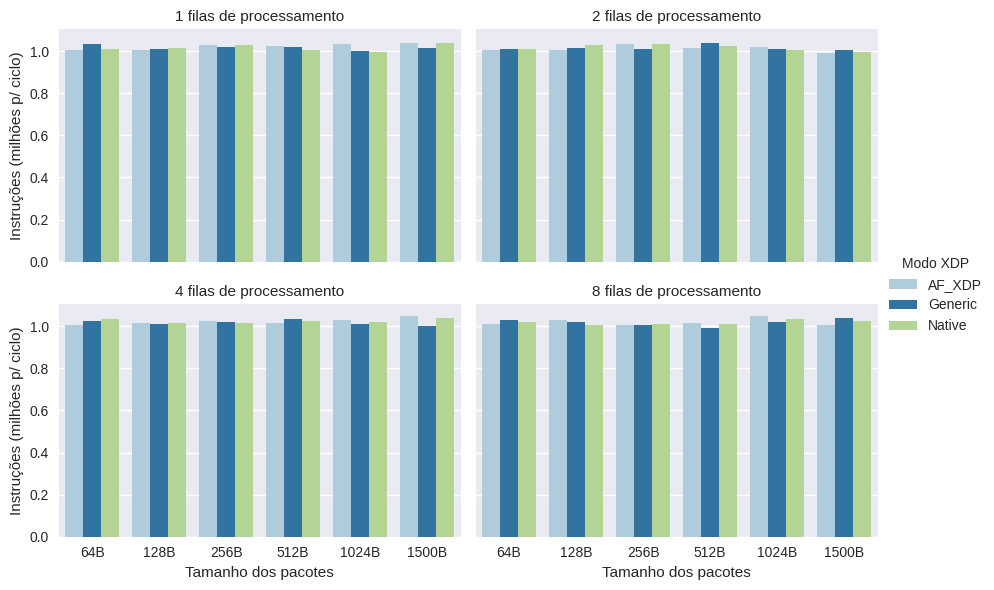

In [18]:
algoritmo= 12800

eixo_x= 'packet_size'
eixo_y= 'instructions'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})

df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='combined', hue='Modo XDP',
    kind="bar", palette='Paired', col_wrap=2,
    height= 3, aspect=3/2
)
grafico.set_ylabels("Instruções (milhões p/ ciclo)")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

grafico.savefig(f'{raiz}/instrucoes_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

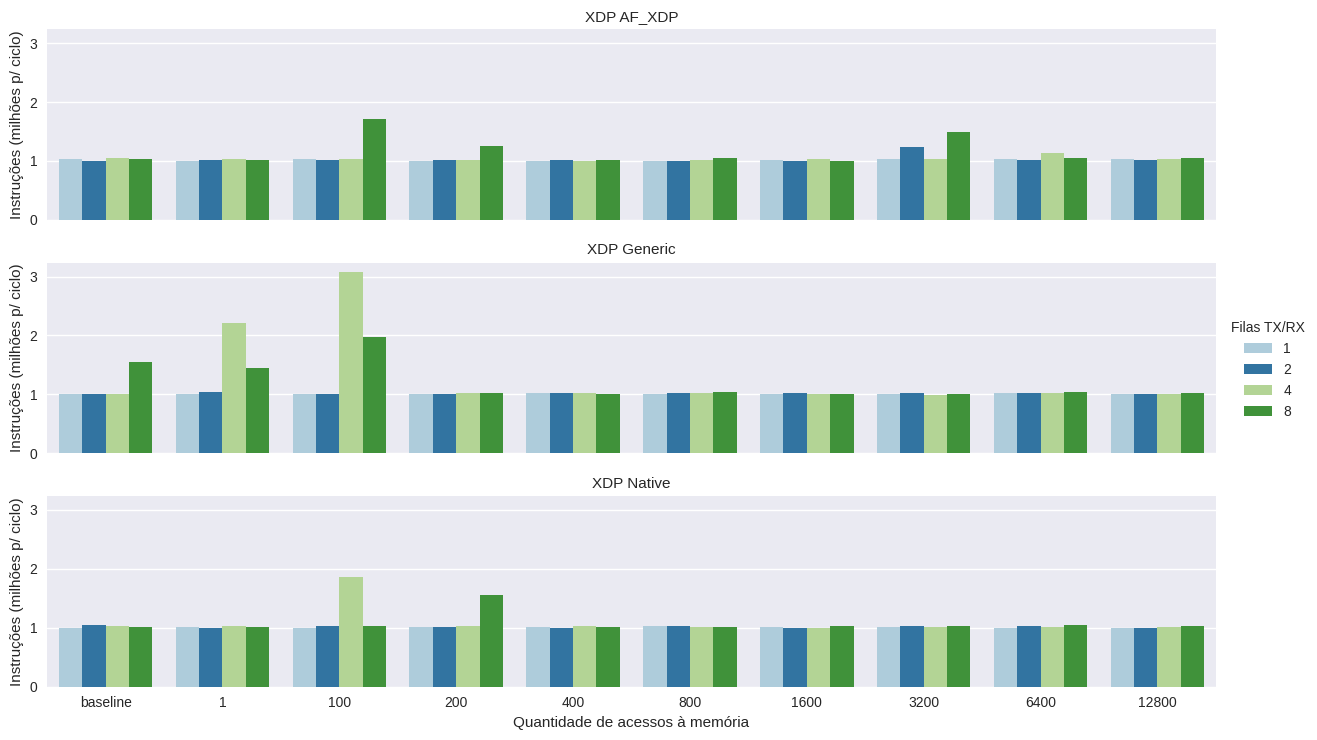

In [37]:
#
packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'instructions'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})
df = df.rename(columns={'combined': 'Filas TX/RX'})
df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 2.5, aspect=10/2
)
grafico.set_ylabels("Instruções (milhões p/ ciclo)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")

grafico.savefig(f'{raiz}/instrucoes_{hue}_x_{eixo_x}@packet_size_{packet_size}{format_imagens}')

# Resultados para ***Branchs***

In [38]:
df_perf.head()

,combined,algoritmo,hook_ebpf,packet_size,instructions,branches,branch_misses,L1_dcache_loads,L1_dcache_load_misses
705,1,0,AF_XDP,64,1.013785,206733,8058,270314,16737
588,1,0,AF_XDP,128,1.027959,208902,7827,274289,0
550,1,0,AF_XDP,256,1.031283,209902,8070,275202,15939
531,1,0,AF_XDP,512,1.019252,207034,7944,272049,14959
668,1,0,AF_XDP,1024,1.027193,208520,8223,273937,16613


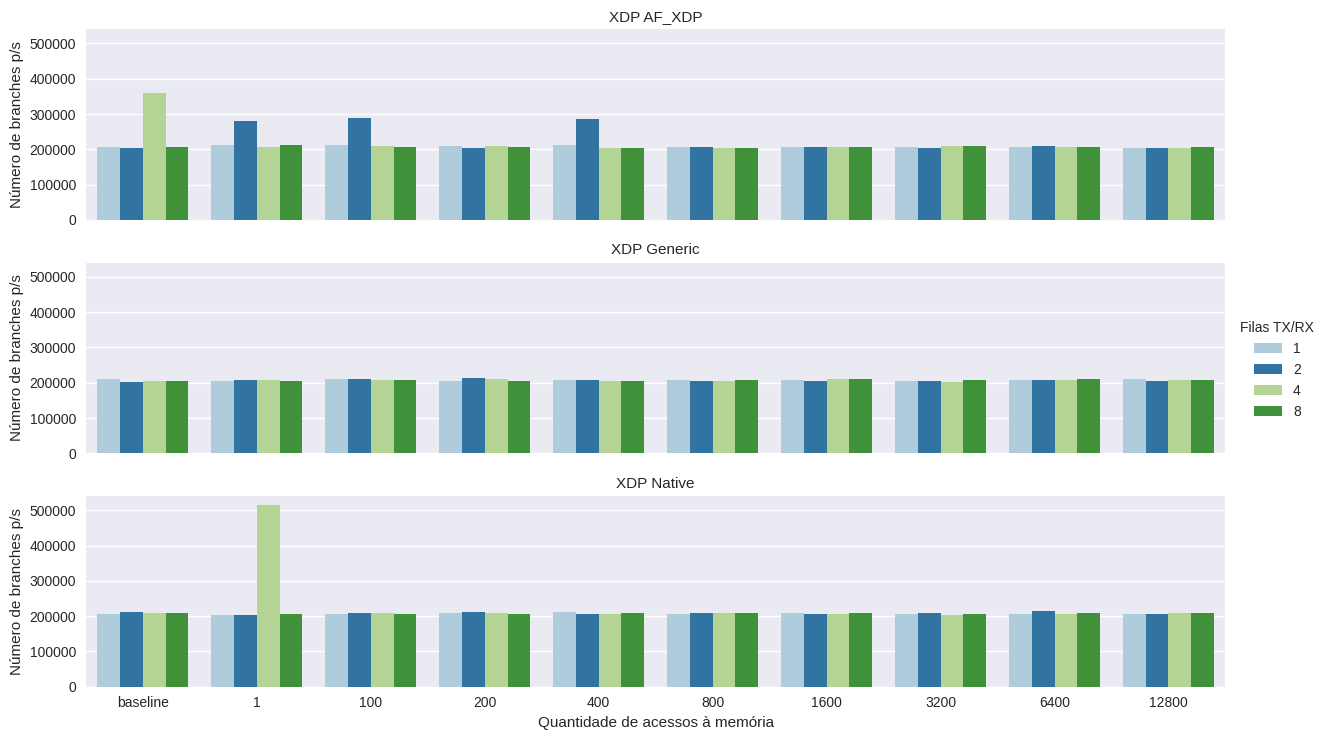

In [40]:

packet_size= 64

eixo_x= 'algoritmo'
eixo_y= 'branches'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})
df = df.rename(columns={'combined': 'Filas TX/RX'})
df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 2.5, aspect=10/2
)
grafico.set_ylabels("Número de branches p/s")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")

grafico.savefig(f'{raiz}/branches_{hue}_x_{eixo_x}@packet_size_{packet_size}{format_imagens}')

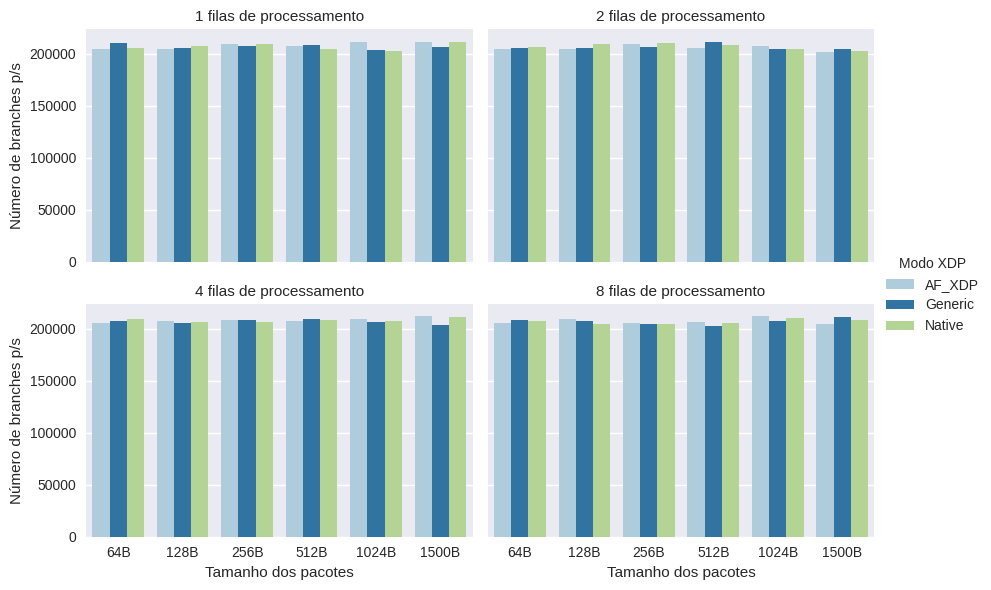

In [41]:
algoritmo= 12800

eixo_x= 'packet_size'
eixo_y= 'branches'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})

df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='combined', hue='Modo XDP',
    kind="bar", palette='Paired', col_wrap=2,
    height= 3, aspect=3/2
)
grafico.set_ylabels("Número de branches p/s")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

grafico.savefig(f'{raiz}/branches_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

# Resultados para ***Load Hits***

In [33]:
df_perf.head()

,combined,algoritmo,hook_ebpf,packet_size,instructions,branches,branch_misses,L1_dcache_loads,L1_dcache_load_misses
705,1,0,AF_XDP,64,1.013785,206733,8058,270314,16737
588,1,0,AF_XDP,128,1.027959,208902,7827,274289,0
550,1,0,AF_XDP,256,1.031283,209902,8070,275202,15939
531,1,0,AF_XDP,512,1.019252,207034,7944,272049,14959
668,1,0,AF_XDP,1024,1.027193,208520,8223,273937,16613


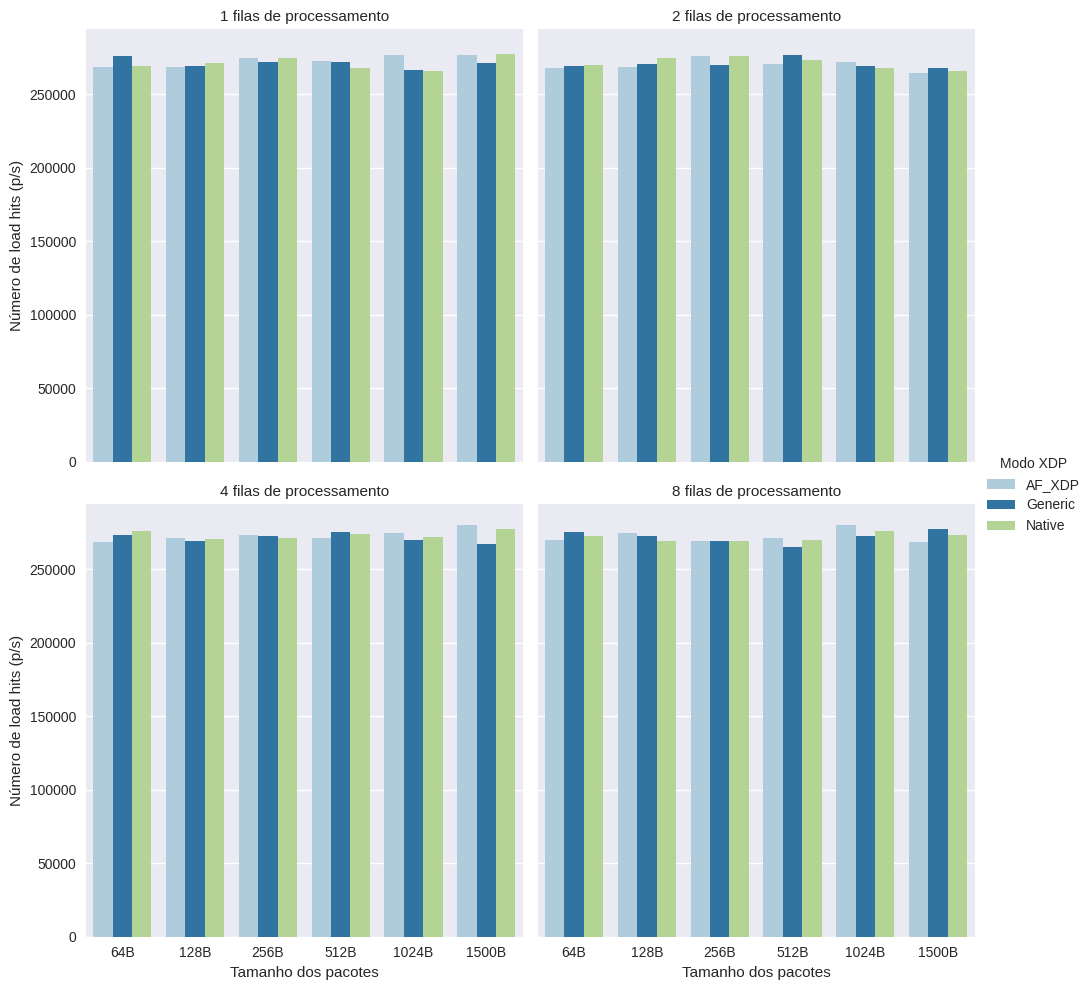

In [51]:
#

algoritmo= 12800

eixo_x= 'packet_size'
eixo_y= 'L1_dcache_loads'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'L1_dcache_loads': 'load_hit_l1'})
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})


df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y='load_hit_l1',
    col='combined', hue='Modo XDP',
    kind="bar", palette='Paired', col_wrap=2
)
grafico.set_ylabels("Número de load hits (p/s)")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

grafico.savefig(f'{raiz}/loads_hit_L1_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

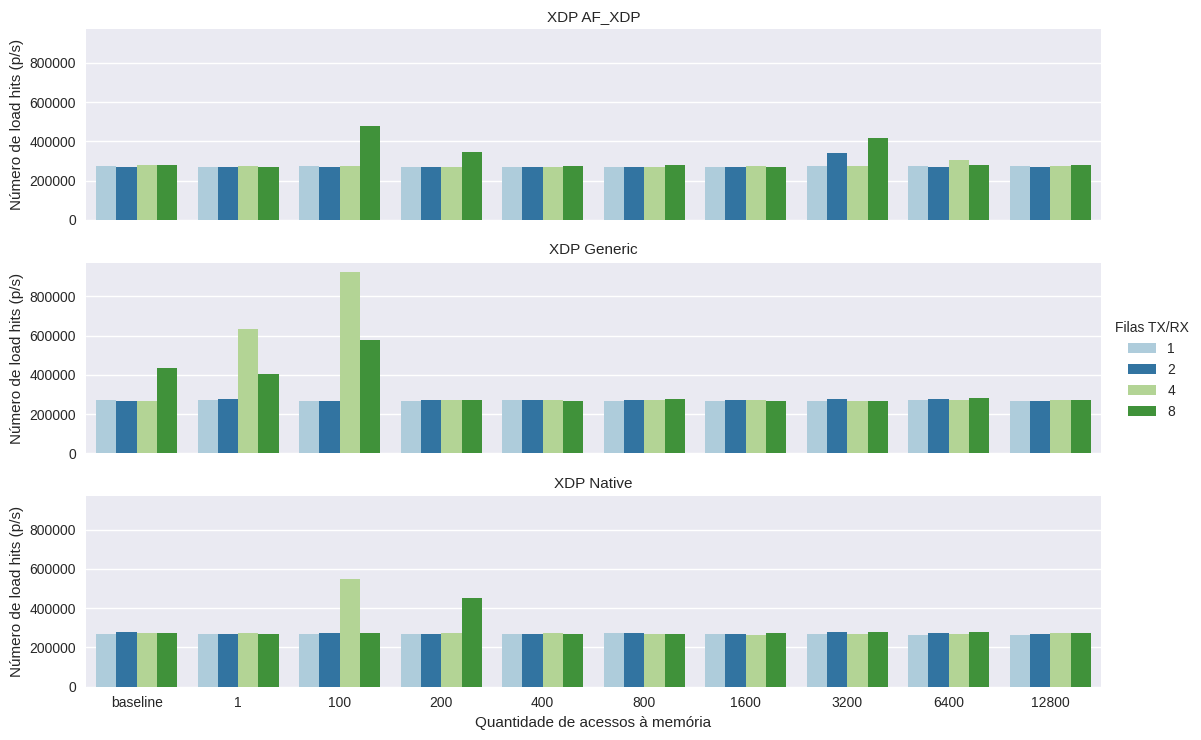

In [43]:

packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'L1_dcache_loads'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'L1_dcache_loads': 'load_hit_l1'})
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})
df = df.rename(columns={'combined': 'Filas TX/RX'})
df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y='load_hit_l1',
    col='Modo XDP', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 2.5, aspect=9/2
)
grafico.set_ylabels("Número de load hits (p/s)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")

grafico.savefig(f'{raiz}/loads_hits_{hue}_x_{eixo_x}@packet_size_{packet_size}{format_imagens}')

# Resultados para ***Load Misses***

In [38]:
df_perf.head()

,combined,algoritmo,hook_ebpf,packet_size,instructions,branches,branch_misses,L1_dcache_loads,L1_dcache_load_misses
705,1,0,AF_XDP,64,1.013785,206733,8058,270314,16737
588,1,0,AF_XDP,128,1.027959,208902,7827,274289,0
550,1,0,AF_XDP,256,1.031283,209902,8070,275202,15939
531,1,0,AF_XDP,512,1.019252,207034,7944,272049,14959
668,1,0,AF_XDP,1024,1.027193,208520,8223,273937,16613


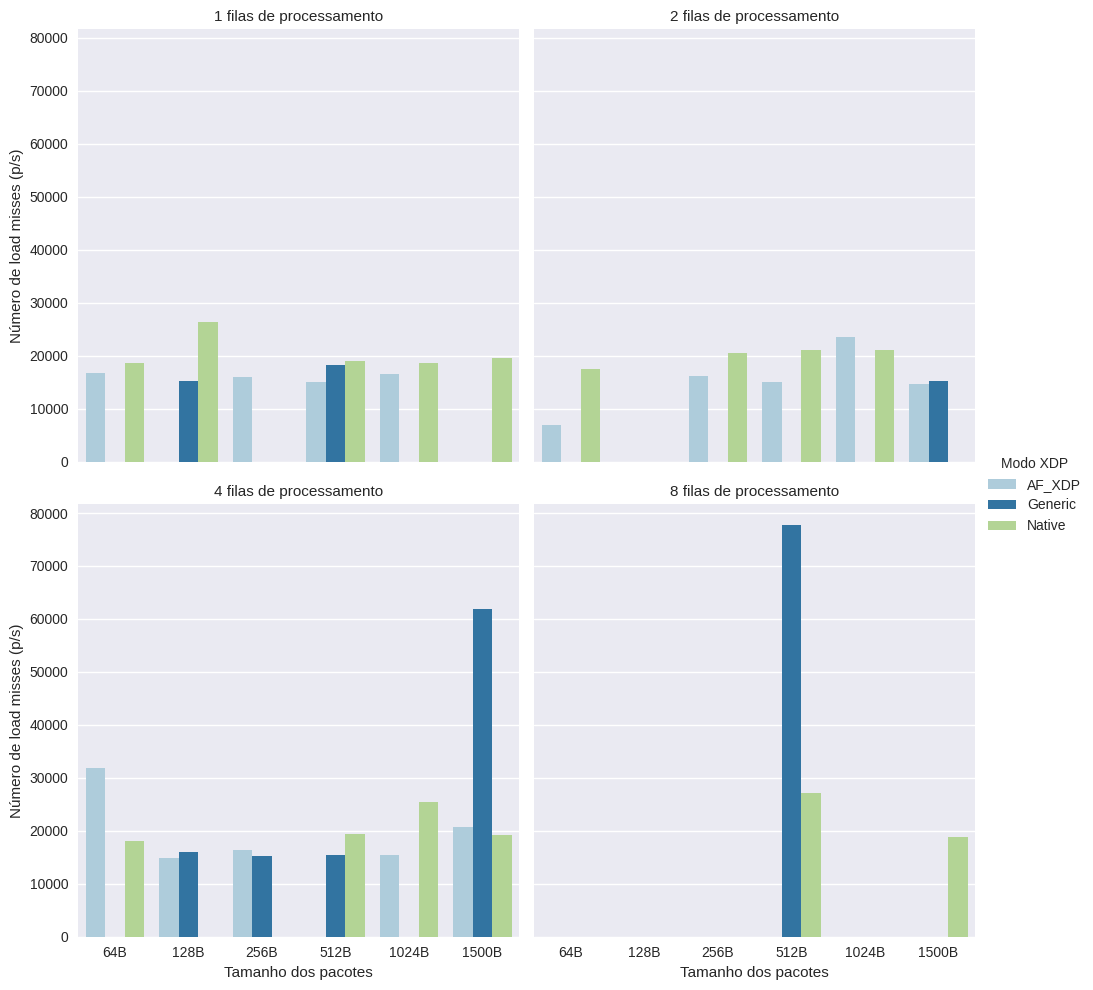

In [46]:
#

algoritmo= 0

eixo_x= 'packet_size'
eixo_y= 'L1_dcache_load_misses'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'L1_dcache_load_misses': 'load_misses_l1'})
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})

df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y='load_misses_l1',
    col='combined', hue='Modo XDP',
    kind="bar", palette='Paired', col_wrap=2
)
grafico.set_ylabels("Número de load misses (p/s)")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

grafico.savefig(f'{raiz}/loads_misses_L1_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

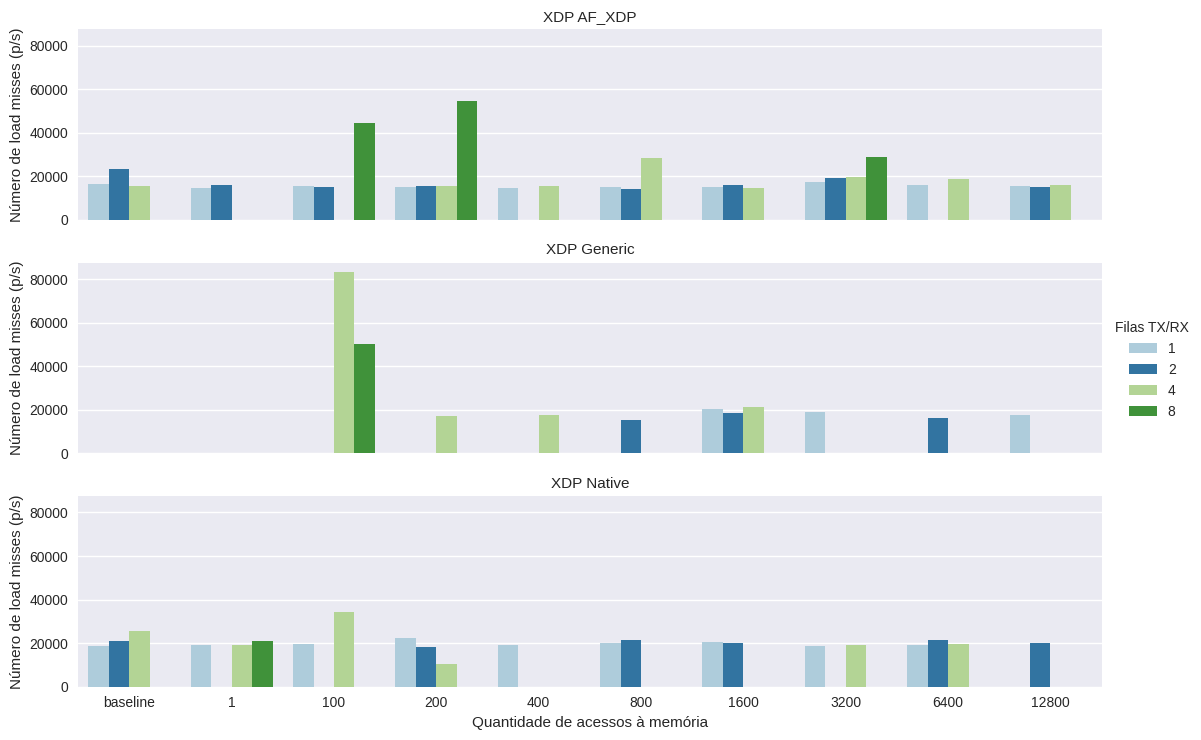

In [44]:

packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'L1_dcache_load_misses'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'L1_dcache_load_misses': 'load_misses_l1'})
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})
df = df.rename(columns={'combined': 'Filas TX/RX'})
df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y='load_misses_l1',
    col='Modo XDP', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 2.5, aspect=9/2
)
grafico.set_ylabels("Número de load misses (p/s)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")

grafico.savefig(f'{raiz}/loads_misses_{hue}_x_{eixo_x}@packet_size_{packet_size}{format_imagens}')